<a href="https://colab.research.google.com/github/AshvinVignesh/Spam-Mail-Detection/blob/main/SPAM_MAIL_CW_(DecisionTree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
headers = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_%3B','char_freq_%28','char_freq_%5B','char_freq_%21','char_freq_%24','char_freq_%23','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']

df = pd.read_csv('spambase.data', header=None, names=headers)

In [52]:
df.describe

<bound method NDFrame.describe of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32     

In [53]:
df = df.drop_duplicates()

In [54]:
df= df.dropna()
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [55]:
df.shape

(4210, 58)

**TRAIN SPLIT**

In [56]:
X = df.drop(columns=['class'])
y= df['class'].values

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [59]:
X = pd.DataFrame( data = scaled_data , columns =X.columns)

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=45)
principle_components =pca.fit_transform(X)

In [62]:
X = pd.DataFrame(data = principle_components, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11', 'PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26',
                                                        'PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45'])
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45
0,-0.766904,0.049607,-0.643951,0.037447,-0.254264,-0.329473,-0.085042,0.350325,1.751285,0.181486,...,-0.299887,0.274410,0.125397,0.250912,0.066610,0.215228,0.215089,-0.396187,0.242057,-0.128966
1,-1.293574,2.007025,0.071455,-0.481325,-0.099272,-1.117621,-0.545048,0.250661,-0.309551,-0.630472,...,-0.116773,-0.479284,-0.183788,0.130243,0.075093,0.247826,0.541134,0.016009,0.313798,0.071334
2,-1.612745,4.821307,3.137288,-1.073432,1.591682,-1.500070,-3.174268,-1.398534,1.032152,2.520447,...,-0.014003,-0.728455,-0.285496,-0.310317,0.943025,0.853985,0.548200,0.312184,-0.752149,0.570495
3,-0.857216,0.414170,-0.551309,-0.031400,-0.049911,0.703172,0.339586,-0.445365,-0.366261,0.183447,...,-0.073627,0.056568,0.260690,-0.308812,0.479506,0.797765,-0.631604,0.341679,-0.307734,-0.459119
4,-0.858070,0.413503,-0.553433,-0.031659,-0.049941,0.703787,0.337838,-0.446646,-0.366599,0.183043,...,-0.073634,0.058233,0.261162,-0.308845,0.479945,0.796964,-0.630188,0.341555,-0.306712,-0.458857


Text(0.5, 1.0, 'scree plot')

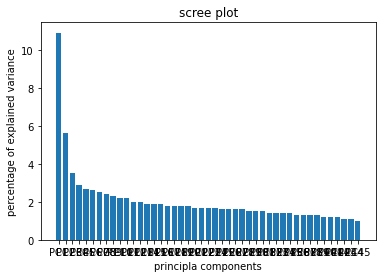

In [63]:
per_var =np.round(pca.explained_variance_ratio_ * 100 , decimals=1)
label = ['PC' + str(x) for x in range(1,len(per_var) + 1 )]
plt.bar(x=range(1,len(per_var)+1),height = per_var , tick_label = label)
plt.ylabel("percentage of explained variance")
plt.xlabel('principla components')
plt.title('scree plot')

In [64]:
# pca = PCA(n_components= 4)
# principle_components = pca.fit_transform(X)

In [65]:
# X = pd.DataFrame(data = principle_components, columns=['PC1', 'PC2','PC3','PC4'])


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 5 , random_state= 42)

In [69]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [70]:
from sklearn import tree


In [71]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_0 <= -0.63
|   |--- feature_1 <= 0.03
|   |   |--- feature_10 <= -0.07
|   |   |   |--- feature_3 <= -0.06
|   |   |   |   |--- feature_23 <= 0.10
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_23 >  0.10
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  -0.06
|   |   |   |   |--- feature_9 <= 1.30
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_9 >  1.30
|   |   |   |   |   |--- class: 0
|   |   |--- feature_10 >  -0.07
|   |   |   |--- feature_17 <= -0.32
|   |   |   |   |--- feature_5 <= -0.91
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  -0.91
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_17 >  -0.32
|   |   |   |   |--- feature_42 <= 0.03
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_42 >  0.03
|   |   |   |   |   |--- class: 0
|   |--- feature_1 >  0.03
|   |   |--- feature_1 <= 1.08
|   |   |   |--- feature_3 <= -0.33
|   |   |   |   |--- feature_22 <= -0.20
|   |   |   

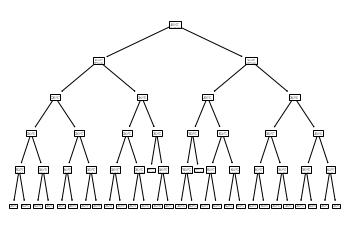

In [72]:
tree.plot_tree(dtree);

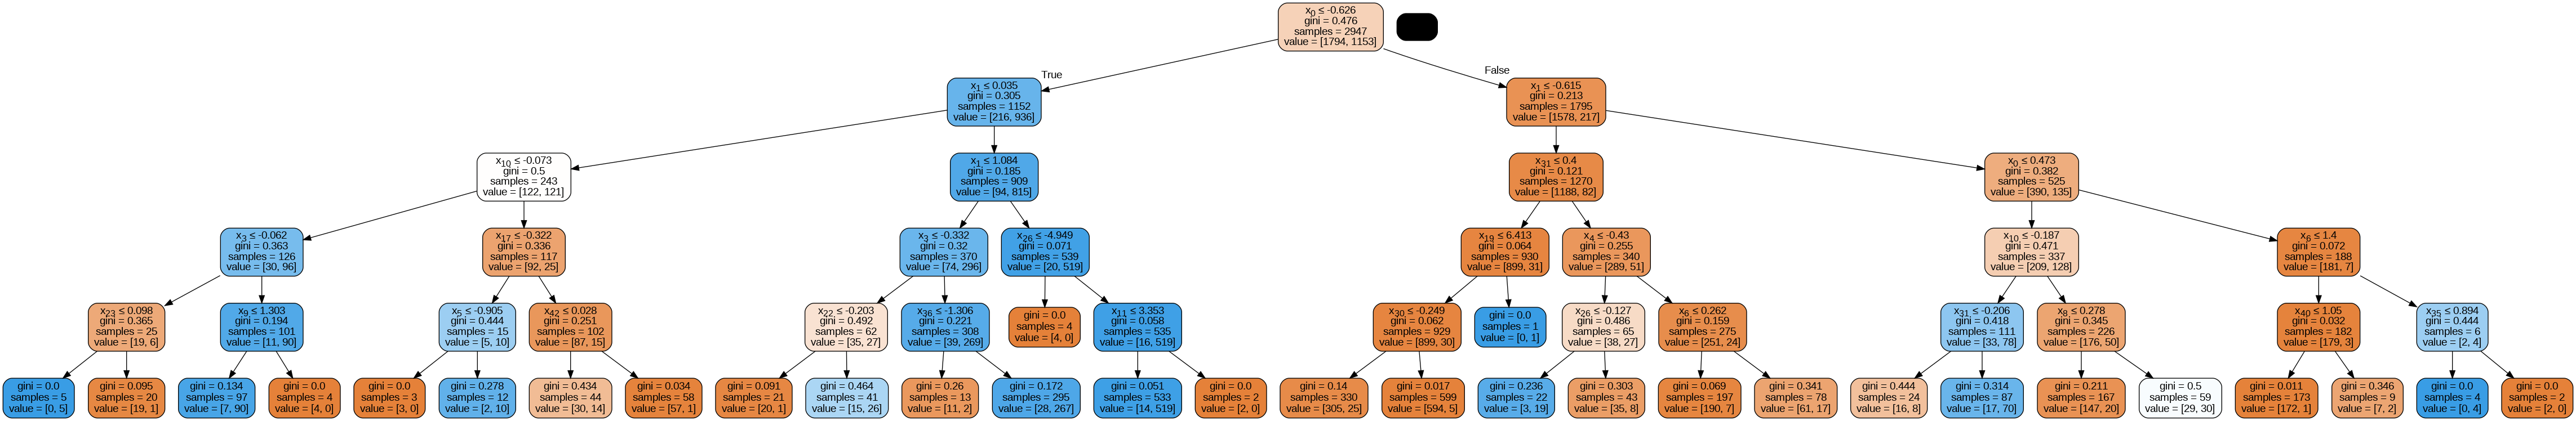

In [73]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [74]:
prediction = dtree.predict(X_test)

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       737
           1       0.85      0.86      0.85       526

    accuracy                           0.88      1263
   macro avg       0.87      0.87      0.87      1263
weighted avg       0.88      0.88      0.88      1263



In [77]:
print(confusion_matrix(y_test,prediction))

[[658  79]
 [ 76 450]]


**ACCURACY**

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
y_pred=dtree.predict(X_test)
acc =accuracy_score(y_test,y_pred)
print(acc*100)

87.72763262074426


Pre pruning 

In [80]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [81]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [82]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.9446895147607737
Test score 0.8923198733174981


post pruning

In [83]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 1.13109377e-04 2.03596878e-04 3.15090407e-04
 3.22361724e-04 3.23904124e-04 3.24574733e-04 3.25755005e-04
 3.26760422e-04 3.31616127e-04 3.32403066e-04 3.33477645e-04
 3.35032838e-04 3.36971685e-04 3.37366696e-04 3.37704551e-04
 3.37826678e-04 3.38558679e-04 3.38693872e-04 3.42408955e-04
 4.28625007e-04 4.46506281e-04 4.52437507e-04 4.52437507e-04
 5.08992195e-04 5.08992195e-04 5.08992195e-04 5.08992195e-04
 5.08992195e-04 5.42925008e-04 5.42925008e-04 5.65546884e-04
 5.91477097e-04 5.93824228e-04 5.93824228e-04 6.06840783e-04
 6.10790635e-04 6.16960237e-04 6.16960237e-04 6.36240244e-04
 6.36892798e-04 6.44723448e-04 6.44723448e-04 6.46339296e-04
 6.59804698e-04 6.59804698e-04 6.62452290e-04 6.63837732e-04
 6.72360748e-04 6.83208039e-04 6.95622667e-04 6.96057703e-04
 7.13881752e-04 7.42408818e-04 7.82204086e-04 8.10940021e-04
 8.14387513e-04 8.22721848e-04 8.24541307e-04 8.53171357e-04
 9.04875014e-04 9.05620135e-04 9.64521704e-04 1.02455203e-03
 1.07330963e-03 1.090697

In [84]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

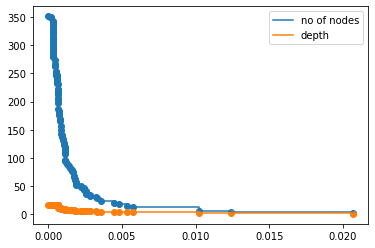

In [85]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

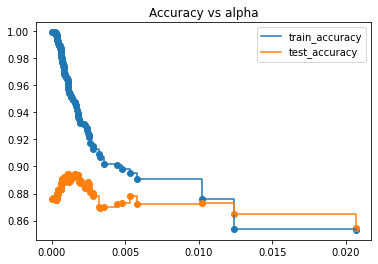

In [86]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [87]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.006)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.8910756701730573
Test score 0.8725257323832145


Ensemble Adaboost Classifier

In [88]:
from sklearn.ensemble import AdaBoostClassifier


In [89]:
model = AdaBoostClassifier(base_estimator=dtree, random_state=42)
model.fit(X_train, y_train)
y_pred_adaboost=model.predict(X_test)
print(f'Test score {accuracy_score(y_pred_adaboost,y_test)*100}')

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test score 91.52810768012668


Gradient Boosting Classifier

In [90]:
from sklearn.ensemble import GradientBoostingClassifier


In [91]:
model1= GradientBoostingClassifier(learning_rate=0.05,random_state=42)
model1.fit(X_train, y_train)
y_pred_GBM=model1.predict(X_test)
print(f'Test score {accuracy_score(y_pred_GBM,y_test)*100}')

Test score 91.84481393507522


XG BOOST

In [92]:
import xgboost as xgb


In [93]:
model2=xgb.XGBClassifier(random_state=42,learning_rate=0.05)
model2.fit(X_train, y_train)
y_pred_xgboost=model2.predict(X_test)
print(f'Test score {accuracy_score(y_pred_xgboost,y_test)*100}')

Test score 92.16152019002375


In [94]:
print(classification_report(y_test,y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       737
           1       0.90      0.91      0.91       526

    accuracy                           0.92      1263
   macro avg       0.92      0.92      0.92      1263
weighted avg       0.92      0.92      0.92      1263

